In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv1D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling1D

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv1D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling1D
from itertools import chain
from array import array

In [2]:
df=pd.read_csv(r"C:\Users\Vandana\Documents\Local_github\Energy-Usage-Prediction-Project\Code\demand_weather_date_daily.csv")
df.head()

,Date,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,Year,month,Day_of_week,Day_of_month,Day_of_year,week_of_year,state_holiday,mnth_sin,mnth_cos
0,2009-01-01,95141.184,11.2,0.0,11.6,37.2,18.8,65,20,6.1,34.01,2009,1,3,1,1,1,True,0.0,1.0
1,2009-01-02,108058.504,10.2,0.0,12.8,36.1,21.9,70,25,5.31,34.25,2009,1,4,2,2,1,False,0.0,1.0
2,2009-01-03,95788.860,9.4,0.0,11.8,34.4,20.3,79,29,5.45,34.11,2009,1,5,3,3,1,False,0.0,1.0
3,2009-01-04,93777.404,10.5,0.0,11.2,36.5,18.5,62,20,5.25,34.05,2009,1,6,4,4,1,False,0.0,1.0
4,2009-01-05,112678.424,11.9,0.0,11.4,37.2,21.8,63,17,6.77,34.18,2009,1,0,5,5,2,False,0.0,1.0


In [3]:
start_date = '2017-01-01'
end_date = '2022-03-31'
# Select DataFrame rows between two dates
mask = (df['Date'] >=start_date) & (df['Date'] <= end_date)
df1 = df.loc[mask]


In [4]:
df1

,Date,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,Year,month,Day_of_week,Day_of_month,Day_of_year,week_of_year,state_holiday,mnth_sin,mnth_cos
2922,2017-01-01,84949.652,10.3,0.0,12.6,32.8,16.1,79,14,7.26,31.56,2017,1,6,1,1,52,True,0.000000,1.0
2923,2017-01-02,97711.548,12.0,0.0,11.6,37.4,16.2,57,12,6.79,31.49,2017,1,0,2,2,1,True,0.000000,1.0
2924,2017-01-03,118582.902,12.2,0.0,12.2,40.2,18.7,53,8,5.62,31.44,2017,1,1,3,3,1,False,0.000000,1.0
2925,2017-01-04,122603.118,12.4,0.0,12.6,43.3,19.8,81,6,5.33,31.27,2017,1,2,4,4,1,False,0.000000,1.0
2926,2017-01-05,101083.388,5.8,0.0,11.8,25.6,20.6,89,46,6.02,23.88,2017,1,3,5,5,1,False,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,2022-03-27,94461.504,4.4,0.4,4.0,25.6,20.8,75,54,7.35,9.21,2022,3,6,27,86,12,False,0.866025,0.5
4829,2022-03-28,96458.404,4.6,0.0,6.6,25.8,17.4,75,56,7.39,13.69,2022,3,0,28,87,13,False,0.866025,0.5
4830,2022-03-29,102975.830,6.4,0.0,4.6,31.5,19.2,75,42,6.98,16.05,2022,3,1,29,88,13,False,0.866025,0.5
4831,2022-03-30,105020.328,4.9,0.0,6.0,27.5,20.8,76,56,8.04,11.93,2022,3,2,30,89,13,False,0.866025,0.5


As seen in EDA, the highest correlation was with temp data, which was 0.23 . So I will not use any weather data and try to expoit the time series nature of the data. I will try to use CNN for this as It can learn from the weigtage of error in the process and correct and learn in the process. I will try initially with Univariate model. So I will try to use demand as my predictors and independt variable. 

# Univariate CNN Models

The main objective of this project is to predict the top 4 summer days in next summer season. SO that organization can cut back their usage to avoid penality. To get we will need the prediction for the all the days of summer as top 4 are relative. So, lets try to predict 90 days of summer.

We need to have sizeable sequence to capture the time series feature and due to this we can not predict the future 90 days together. Also, we are using the sequence from the previous day to predict the coming day, so to do the forecast we need to use our prediction as the input for the coming week. We know it will add up the error in model. But lets see how good or bad this model works.

# Forecating Summer 2022 (90 days)

In [5]:
## Training the model

In [6]:
uni_df=df1["Operational Demand (MW)"]
#uni_df=uni_df.drop("index",axis=1)
uni_df

2922     84949.652
2923     97711.548
2924    118582.902
2925    122603.118
2926    101083.388
           ...    
4828     94461.504
4829     96458.404
4830    102975.830
4831    105020.328
4832    105647.568
Name: Operational Demand (MW), Length: 1911, dtype: float64

In [7]:
train_idx=1668

In [8]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(0,len(sequence),1):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [9]:
# define input sequence
train = list(uni_df[:train_idx])
test=list(uni_df[train_idx-1:train_idx+121])
# choose a number of time steps
n_steps_in, n_steps_out = 14, 1
# split into samples
X, y = split_sequence(train, n_steps_in, n_steps_out)
n_features = 1
#X = X.reshape((X.shape[0], X.shape[1], n_features))

In [10]:
# define model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [11]:
# fit model
model.fit(X, y, epochs=100)

Epoch 1/100
52/52 [==============================] - 1s 3ms/step - loss: 3734946304.0000
Epoch 2/100
52/52 [==============================] - 0s 4ms/step - loss: 106635432.0000
Epoch 3/100
52/52 [==============================] - 0s 4ms/step - loss: 99238152.0000
Epoch 4/100
52/52 [==============================] - 0s 4ms/step - loss: 98065472.0000
Epoch 5/100
52/52 [==============================] - 0s 4ms/step - loss: 96367160.0000
Epoch 6/100
52/52 [==============================] - 0s 4ms/step - loss: 95115032.0000
Epoch 7/100
52/52 [==============================] - 0s 4ms/step - loss: 94004776.0000
Epoch 8/100
52/52 [==============================] - 0s 4ms/step - loss: 90677744.0000
Epoch 9/100
52/52 [==============================] - 0s 4ms/step - loss: 87560040.0000
Epoch 10/100
52/52 [==============================] - 0s 4ms/step - loss: 85051408.0000
Epoch 11/100
52/52 [==============================] - 0s 4ms/step - loss: 83039832.0000
Epoch 12/100
52/52 [==================

## Testing the model

In [12]:
# Predictions-
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
yhat = model.predict(X_test, verbose=0)

In [13]:
import itertools
new_yhat=list(itertools.chain.from_iterable(yhat))
new_ytest=list(itertools.chain.from_iterable(y_test))

In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(new_ytest,new_yhat)

5.993309009548673

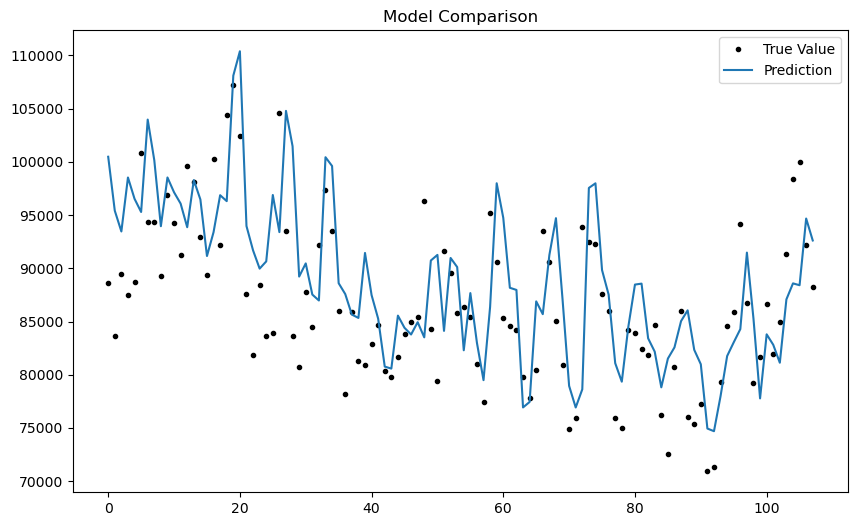

In [15]:
def comparison_plot():
    """Visualizing the training + validation sets"""
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.set_title("Model Comparison")
    ax.plot(new_ytest,'.k', label='True Value')
    ax.plot(new_yhat, label="Prediction")
    ax.legend()
    plt.show()   
comparison_plot()

MAPE of 5.99 seems ok. Lets see how this model forecast the summer

## Forecasting next 90 days

In [16]:
# Forecasting

def split_seq_forecast(sequence, n_steps):
    X = list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        X.append(seq_x)        
    return array(X)

In [17]:
def split_seq_forecast(sequence, n_steps):
    X = list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        X.append(seq_x)        
    return array(X)

In [18]:
def create_new_function(forecast):
    summer_prediction=[]    
    X_forecast= split_seq_forecast(forecast,14)
    X_forecast = X_forecast.reshape((X_forecast.shape[0], X_forecast.shape[1], n_features))
    y_forecast = model.predict(X_forecast, verbose=0)
    forecast=list(chain(*y_forecast))
    yhat=forecast
    summer_prediction.append(yhat)
    present=X_forecast.tolist()
    seq = list(chain(*present))
    z=seq[1:]
    z.append(yhat)
    concat_list = [j for i in z for j in i]
    new_forecast=pd.Series(concat_list)
    return (new_forecast)

In [19]:
create_new_function(test)

0       106222.096000
1       114538.596000
2       107061.396000
3       102166.974000
4       101870.566000
            ...      
1629     88583.429688
1630     88410.148438
1631     94678.804688
1632     92614.945312
1633     85910.617188
Length: 1634, dtype: float64

In [20]:
forecast_list = []

def method1(forecast):
    summer=[]
    for i in range(121):
        n = create_new_function(forecast) 
        forecast_list.append(n) 
        lst=forecast_list[i]
        summer.append(lst[13])
        #print(summer)
        n = n + 1
        forecast= n
    return summer

In [21]:
uni_df[train_idx+108:train_idx+122]
#forecast

4698    85860.748
4699    94179.432
4700    86735.772
4701    79253.104
4702    81648.806
4703    86674.602
4704    81953.832
4705    84936.886
4706    91386.502
4707    98433.892
4708    99994.126
4709    92214.396
4710    88216.920
4711    81755.164
Name: Operational Demand (MW), dtype: float64

In [22]:
Summer_prediction=method1(uni_df[train_idx+108:train_idx+122])
Prediction=pd.Series(Summer_prediction)
#Prediction

0      87150.281250
1      88803.531250
2      89769.679688
3      88146.265625
4      88223.343750
           ...     
116    55371.238281
117    55104.718750
118    54899.792969
119    54635.792969
120    54432.582031
Length: 121, dtype: float64

In [23]:
#uni_df[train_idx+122:]

4712     81389.002
4713     83692.208
4714     87674.768
4715     86230.014
4716     83724.146
           ...    
4828     94461.504
4829     96458.404
4830    102975.830
4831    105020.328
4832    105647.568
Name: Operational Demand (MW), Length: 121, dtype: float64

In [24]:
actual_summer=uni_df[train_idx+122:]

In [25]:
type(actual_summer),type(Prediction)

(pandas.core.series.Series, pandas.core.series.Series)

In [26]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(actual_summer,Prediction)

31.568687333484213

In [27]:
observed=actual_summer.reset_index(drop=True)
prediction=Prediction.reset_index(drop=True)


In [28]:
results=pd.concat([observed, prediction], axis=1)
results.rename(columns={0 : 'Prediction',"Operational Demand (MW)": "Actual"}, inplace=True)
results

,Actual,Prediction
0,81389.002,87150.281250
1,83692.208,88803.531250
2,87674.768,89769.679688
3,86230.014,88146.265625
4,83724.146,88223.343750
...,...,...
116,94461.504,55371.238281
117,96458.404,55104.718750
118,102975.830,54899.792969
119,105020.328,54635.792969


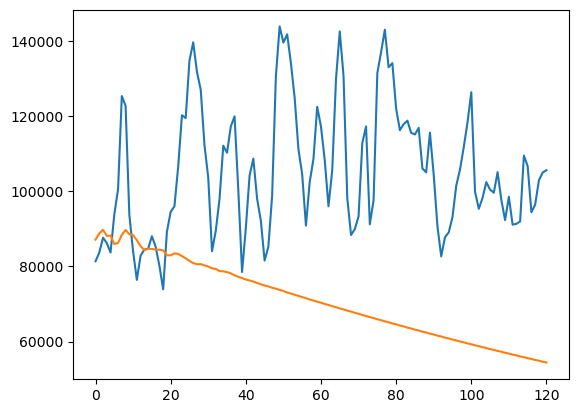

In [29]:
plt.plot(results['Actual'])
plt.plot(results['Prediction'])
plt.show()

As we can see the 90 days prdiction model is not good. It snowbowled the errors and ultimately gives us the negative line prediction.

This will be limitation of our model, that we can not forecast the whole summer in advance so will not able to predict the 4 days accurately. Lets see how our model predict 7 days in future

# 7 days prediction model

In [57]:
# multi-step data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(0,len(sequence),7):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


In [58]:
train_idx=int(len(uni_df)*.8)
train_idx

77990

In [59]:
# define input sequence
train = list(uni_df[:train_idx])
test=list(uni_df[train_idx:])
# choose a number of time steps
n_steps_in, n_steps_out = 14, 7
# split into samples
X, y = split_sequence(train, n_steps_in, n_steps_out)
# summarize the data
print(X[0], y[0])
print(X[1], y[1])

[1815.214 1777.04  1745.448 1729.164 1714.276 1699.92  1692.876 1676.196
 1683.966 1685.85  1690.912 1659.93  1667.302 1652.892] [1642.998 1638.536 1659.798 1670.03  1674.754 1669.434 1664.774]
[1676.196 1683.966 1685.85  1690.912 1659.93  1667.302 1652.892 1642.998
 1638.536 1659.798 1670.03  1674.754 1669.434 1664.774] [1655.122 1660.776 1661.4   1663.378 1681.738 1675.242 1677.668]


In [60]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [61]:
# fit model
model.fit(X, y, epochs=100)

Epoch 1/100
349/349 [==============================] - 2s 3ms/step - loss: 308779.4375
Epoch 2/100
349/349 [==============================] - 1s 3ms/step - loss: 114776.1797
Epoch 3/100
349/349 [==============================] - 1s 3ms/step - loss: 80127.2109
Epoch 4/100
349/349 [==============================] - 1s 3ms/step - loss: 68618.8047
Epoch 5/100
349/349 [==============================] - 1s 3ms/step - loss: 66820.9141
Epoch 6/100
349/349 [==============================] - 1s 4ms/step - loss: 64467.9023
Epoch 7/100
349/349 [==============================] - 1s 3ms/step - loss: 64774.4297
Epoch 8/100
349/349 [==============================] - 1s 3ms/step - loss: 62995.9258
Epoch 9/100
349/349 [==============================] - 1s 4ms/step - loss: 59599.3047
Epoch 10/100
349/349 [==============================] - 1s 4ms/step - loss: 59243.5039
Epoch 11/100
349/349 [==============================] - 1s 3ms/step - loss: 57904.1953
Epoch 12/100
349/349 [============================

In [62]:
# Predictions-
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[1814.323  1808.7877 1816.1259 ... 1869.3824 1914.1519 1968.6763]
 [2073.7454 2193.7603 2319.8972 ... 2514.7708 2548.0522 2529.2778]
 [2678.2214 2607.4023 2520.4824 ... 2353.9685 2287.1997 2221.8975]
 ...
 [1205.5399 1164.7894 1180.1603 ... 1178.3062 1221.709  1295.4868]
 [1887.684  2087.6672 2290.033  ... 2667.5776 2771.001  2786.3635]
 [2647.4922 2570.6519 2433.5605 ... 2198.396  2095.28   1998.7305]]


In [63]:
import itertools
new_yhat=list(itertools.chain.from_iterable(yhat))
new_ytest=list(itertools.chain.from_iterable(y_test))

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(new_ytest,new_yhat)

8.122807026852632

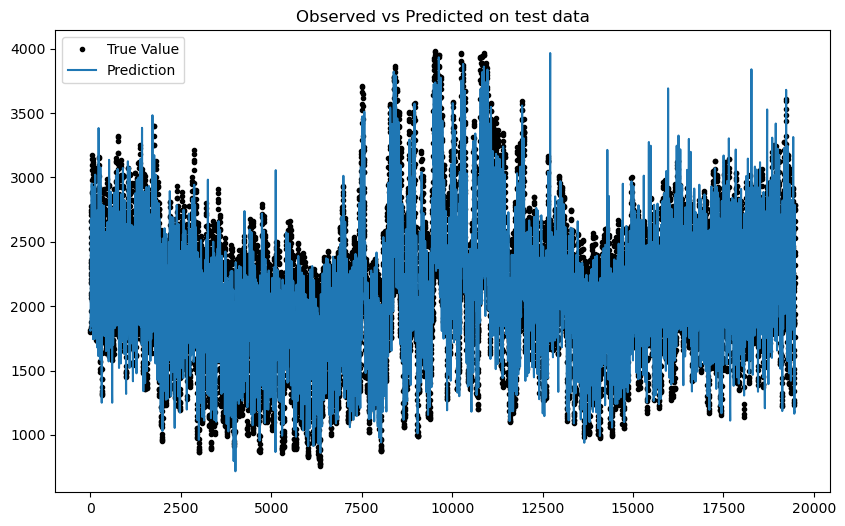

In [70]:
def comparison_plot():
    """Visualizing the training + validation sets"""
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.set_title("Observed vs Predicted on test data")
    ax.plot(new_ytest,'.k', label='True Value')
    ax.plot(new_yhat, label="Prediction")
    ax.legend()
    plt.show()   
comparison_plot()

This model has MAPE of 8.12 and doesn't seems too good to predict the coming week. Let's try the half hourly observations rather than Daily total energy demand. 

##  2 days (96 observation) Prediction on half an hour interval data

In [110]:
df=pd.read_csv(r"C:\Users\Vandana\Documents\Local_github\Energy-Usage-Prediction-Project\Code\merged_data.csv")
df.head()

,Unnamed: 0,timestamp,Operational Demand (MW),temperature(celcius),dew_point(celcius),humidity(%),Wind,wind_speed(mph),wind_gush(mph),pressure(in),precip.(in),Condition
0,0,2017-01-22 00:00:00,1815.214,20.0,15.0,73.0,SSW,9.0,0.0,29.0,0.0,Fair
1,1,2017-01-22 00:30:00,1777.040,20.0,15.0,73.0,SSW,10.0,0.0,29.0,0.0,Fair
2,2,2017-01-22 01:00:00,1745.448,18.9,15.0,78.0,SSW,9.0,0.0,29.0,0.0,Fair
3,3,2017-01-22 01:30:00,1729.164,18.9,15.0,78.0,SSW,15.0,0.0,29.0,0.0,Fair
4,4,2017-01-22 02:00:00,1714.276,18.9,12.8,68.0,SSW,18.0,0.0,29.0,0.0,Fair


In [111]:
df.drop(df.columns[[0]], axis=1, inplace=True)
df.drop(df.tail(16).index,inplace=True) # drop last 1 rows

In [112]:
uni_df=df["Operational Demand (MW)"]
uni_df

0        1815.214
1        1777.040
2        1745.448
3        1729.164
4        1714.276
           ...   
97483    2321.674
97484    2226.440
97485    2115.170
97486    2022.864
97487    1940.888
Name: Operational Demand (MW), Length: 97488, dtype: float64

## with 192 obs input and 96 output

For this model we will make a sequence of 192 observation as input i.e. 2 days of observation sequence as our input and 96 observation ( 2 day) observation as output. 

In [113]:
train_idx=int((len(uni_df)*.8//192)*192) # using 80% as training data 
test_idx= len(uni_df)-192-96

In [114]:
# multi-step data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(0,len(sequence),192):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
    # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence
train = list(uni_df[:train_idx])
test=list(uni_df[train_idx:test_idx])
forecast=list(uni_df[test_idx:test_idx+193])
# choose a number of time steps
n_steps_in, n_steps_out = 192,96
# split into samples
X, y = split_sequence(train, n_steps_in, n_steps_out)
# summarize the data
#print(X[0], y[0])
#print(X[1], y[1])

In [115]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [122]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

In [123]:
# fit model
model.fit(X, y, epochs=400)

Epoch 1/400
13/13 [==============================] - 0s 6ms/step - loss: 3262846.5000
Epoch 2/400
13/13 [==============================] - 0s 5ms/step - loss: 2149195.0000
Epoch 3/400
13/13 [==============================] - 0s 6ms/step - loss: 1300941.3750
Epoch 4/400
13/13 [==============================] - 0s 6ms/step - loss: 728630.1250
Epoch 5/400
13/13 [==============================] - 0s 7ms/step - loss: 391533.3125
Epoch 6/400
13/13 [==============================] - 0s 6ms/step - loss: 205646.1094
Epoch 7/400
13/13 [==============================] - 0s 6ms/step - loss: 119589.5391
Epoch 8/400
13/13 [==============================] - 0s 6ms/step - loss: 83326.4922
Epoch 9/400
13/13 [==============================] - 0s 5ms/step - loss: 68832.6094
Epoch 10/400
13/13 [==============================] - 0s 5ms/step - loss: 62692.6406
Epoch 11/400
13/13 [==============================] - 0s 5ms/step - loss: 59791.3398
Epoch 12/400
13/13 [==============================] - 0s 6ms/ste

13/13 [==============================] - 0s 5ms/step - loss: 40499.4180
Epoch 193/400
13/13 [==============================] - 0s 5ms/step - loss: 39751.4141
Epoch 194/400
13/13 [==============================] - 0s 5ms/step - loss: 39545.9844
Epoch 195/400
13/13 [==============================] - 0s 5ms/step - loss: 38786.7539
Epoch 196/400
13/13 [==============================] - 0s 5ms/step - loss: 39350.1836
Epoch 197/400
13/13 [==============================] - 0s 5ms/step - loss: 42156.4258
Epoch 198/400
13/13 [==============================] - 0s 5ms/step - loss: 40482.5000
Epoch 199/400
13/13 [==============================] - 0s 5ms/step - loss: 41454.2812
Epoch 200/400
13/13 [==============================] - 0s 5ms/step - loss: 41740.2930
Epoch 201/400
13/13 [==============================] - 0s 5ms/step - loss: 40722.0938
Epoch 202/400
13/13 [==============================] - 0s 5ms/step - loss: 39791.4297
Epoch 203/400
13/13 [==============================] - 0s 5ms/step -

13/13 [==============================] - 0s 8ms/step - loss: 35558.8242
Epoch 383/400
13/13 [==============================] - 0s 10ms/step - loss: 35587.7109
Epoch 384/400
13/13 [==============================] - 0s 9ms/step - loss: 38529.2188
Epoch 385/400
13/13 [==============================] - 0s 9ms/step - loss: 35346.2539
Epoch 386/400
13/13 [==============================] - 0s 10ms/step - loss: 35266.4609
Epoch 387/400
13/13 [==============================] - 0s 9ms/step - loss: 37844.5391
Epoch 388/400
13/13 [==============================] - 0s 10ms/step - loss: 35357.5469
Epoch 389/400
13/13 [==============================] - 0s 10ms/step - loss: 34949.0820
Epoch 390/400
13/13 [==============================] - 0s 9ms/step - loss: 37552.1562
Epoch 391/400
13/13 [==============================] - 0s 10ms/step - loss: 37221.5781
Epoch 392/400
13/13 [==============================] - 0s 10ms/step - loss: 39417.4805
Epoch 393/400
13/13 [==============================] - 0s 10ms

In [124]:
# Predictions-
X_test, y_test = split_sequence(test, n_steps_in, n_steps_out)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))
yhat = model.predict(X_test, verbose=0)
#print(yhat)

[[1975.5441 1945.8925 1888.5739 ... 2244.7358 2121.5923 2045.2065]
 [1997.9033 2015.6383 1921.0664 ... 2305.1672 2230.1702 2127.6128]
 [1902.2583 1900.4808 1839.9941 ... 2179.7166 2104.0679 2007.8741]
 ...
 [1961.8267 1914.4618 1895.7552 ... 2229.4346 2130.2173 2059.1907]
 [2026.8567 2037.5314 1943.5441 ... 2326.044  2246.1743 2142.9185]
 [2009.1411 1987.2883 1947.2157 ... 2319.1868 2217.222  2139.3147]]


In [125]:
new_yhat=list(itertools.chain.from_iterable(yhat))
new_ytest=list(itertools.chain.from_iterable(y_test))

In [126]:
mean_absolute_percentage_error(new_ytest,new_yhat)

10.367300896568414

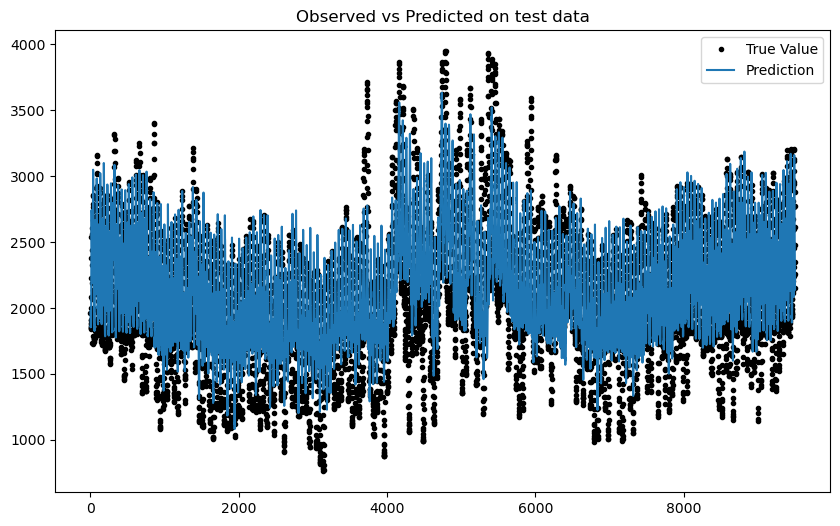

In [127]:
comparison_plot()

With 2 days prediction ( 96 observation on half an hour basis), is also not as good. This model is having MAPE of 10.36. So we can say Univariate CNN model doesn't capture the actual trend and couldn't exploit  the time series nature completely. We will try to use Date and its features like day of month, week of year, holiday , is working day etc in our CNN multivariate model and compare how that model performs. 